# Load the relevant package

In [720]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

# Analysis

## Hypothesis and questions

* The difficulty of getting the scientific information could be influenced by the age and education level
* The method to get the exercise information could be differ by differnt age groups and education level
* Most of the people do not satify the current information
* Most of the people in Taiwan find the exercise related information on social media
* Most of the people in Taiwan search on the internet by themselves to deal with the obstacle during exercising 
* Most of the people do not satify the current information
* We can build a predictive model to predict whether the people is willing to pay for the service

* how people think about scietific information when it comes to exercise?
* For the low satisfaction people, how do they think of the scientific information and where do they get the information?
* Which kind of platform is prefered by the people who is willing to share the information?
* Which factor influence the willing of paying the most?

## Load, translate, and quantify the collected data

In [386]:
raw_data = pd.read_csv('C:/Users/a1003/OneDrive/桌面/other/PAEndless/sports_survey.csv')

In [387]:
raw_data.head(1)

,時間戳記,性別,年齡,目前就業狀況?,若您從事運動產業，您的職業是何者?,教育程度,您有運動習慣嗎?,如果有，您已經規律運動多久?,當您在運動時遇到問題或困難，都如何解決呢?,請您簡單描述您在運動時曾經遇到的問題(例如: 受傷、缺乏動力，飲食...),當您上網搜尋運動相關資訊時，您優先使用的平台是何者?,您有使用那些運動相關app?,當您在搜尋資料時，您習慣使用手機還是電腦?,您滿意您搜尋到的結果嗎?,當您在網路上搜尋時，您會很難找到適合且正確(科學根據)的資訊嗎?,對您來說，科學根據的資訊重要嗎?,對您來說，獲得有科學根據的資訊是急迫的嗎?,如果有一個平台由專業人士提供有科學根據且正確的資訊，您願意花費多少來獲得這項服務?,您願意分享您的專業運動知識或經驗嗎?,如果有機會，您想以怎樣的形式分享呢?,如果您是一位分享者，您會想要分享在怎麼樣的平台?,如果您可以藉由分享資訊而獲得回饋，您期望其價值為? (例如: 每篇文章80元...)
0,1/29/2021 1:41:33,男性,18-25,學生,學生,大專院校,有,2-5年,"上網搜尋, 與朋友討論",膝蓋在打完籃球後疼痛,部落格文章,無,電腦,8,不難,8,6,300-600 NTD/年,願意,影片,網路流量大,NaN


In [388]:
 pd.set_option('display.max_columns', 500)
data = raw_data.copy()

In [389]:
### columns translation
data.columns = ["time", "gender", "age", "current work", "profession", "education", "exercise habit",
               "exercise frequency", "solution of the obstacle", "obstacle during exercise", "how to get the exercise-related information",
               "sports app usage", "phone or computor", "satisfaction", "is it hard to find the scientific information?", "is it important for the scientific information?",
               "is it urgent?", "how much willing to pay", "Willing to shae or not", "how to share", "which kind of platform", "expectation (price)"]

In [390]:
data["gender"] = data["gender"].replace({"男性":"M", "女性":"F"})
data["age"] = data["age"].replace({
                                   "<18":"under_age",
                                   "18-25":"adult",
                                   "26-30":"adult", 
                                   "30-40":"adult",
                                   "30-40":"mid_age",
                                   "40-50":"mid_age", 
                                   ">50":"old_adult", 
                                  })
data["current work"] = data["current work"].replace({
                                   "學生":"student",
                                   "就業":"employee",
                                   "待業":"unemployee", 
                                   "就業, 自雇者":"self-employee",
                                   "自雇者":"self-employee",
                                   "金融":"employee", 
                                   "已退休":"retired",
                                   "家管":"unemployee", 
                                  })
data["profession"] = data["profession"].replace({
                                   "學生":"student",
                                   "運動員":"athlete",
                                   "研究員":"researcher", 
                                   "私人教練":"trainer",
                                   "物理治療師":"physiotherapist",
                                   "醫生":"doctor", 
                                   "營養師":"nutritionist",
                                   "專項教練":"trainer",
                                   "運動心理師":"psychologist",
                                   "運動分析師":"analyst",
                                   "體育教師":"PE",
                                   "以上皆非":"None_above"
                                  })
data["education"] = data["education"].replace({
                                   "大專院校":"BA",
                                   "碩士生":"MSc",
                                   "博士生":"PhD", 
                                   "高中職":"Senior"
                                  })
data["exercise habit"] = data["exercise habit"].replace({
                                   "有":"Y",
                                   "沒有":"N"
                                  })
data["exercise frequency"] = data["exercise frequency"].replace({
                                   "2-5年":"2-5",
                                   "我沒有運動習慣":"N",
                                   "10年以上":">10",
                                   "少於2年":"<2",
                                   "5-10年":"5-10"
                                  })
data["solution of the obstacle"] = data["solution of the obstacle"].replace({
                                   "上網搜尋, 與朋友討論":["internet, friends"],
                                   "上網搜尋, 請教專業人員(例如: 教練...), 與朋友討論":["internet, profession, friends"],
                                   "上網搜尋, 請教專業人員(例如: 教練...)":["internet, profession"],
                                   "與朋友討論, 請教專業人員(例如: 教練...)":["friends, profession"],
                                   "上網搜尋":["internet"],
                                   "上網搜尋, 查書":["internet, books"],
                                   "請教專業人員(例如: 教練...), 與朋友討論":["profession, friends"],
                                   "不理會":["N"],
                                   "與朋友討論":["friends"],
                                   "請教專業人員(例如: 教練...)": ["profession"]
                                  })

data["phone or computor"] = data["phone or computor"].replace({
                                   "電腦":"PC",
                                   "手機":"PH"
                                  })
data["is it hard to find the scientific information?"] = data["is it hard to find the scientific information?"].replace({
                                   "不難":0,
                                   "很難":1
                                  })
data["how much willing to pay"] = data["how much willing to pay"].replace({
                                   "300-600 NTD/年":"low",
                                   "1000-1500 NTD/年":"mid",
                                   "600-1000 NTD/年": "high"
                                  })
data["Willing to shae or not"] = data["Willing to shae or not"].replace({
                                   "願意":1,
                                   "不願意":0
                                  })
data["which kind of platform"] = data["which kind of platform"].replace({
                                   "網路流量大":"big_traffic",
                                   "免費使用":"free",
                                   "功能多樣":"multifunc",
                                   "網站設計美觀":"UI/UX",
                                   "提供回饋": "reward"
                                  })

In [391]:
data

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1/29/2021 1:41:33,M,adult,student,student,BA,Y,2-5,"internet, friends",膝蓋在打完籃球後疼痛,部落格文章,無,PC,8,0,8,6,low,1.0,影片,big_traffic,NaN
1,1/29/2021 1:46:35,F,adult,student,student,MSc,Y,2-5,"internet, friends",受傷過一次,"學術期刊/引擎(例如: google scholar、PubMed...), Youtube",FitNotes,PH,8,0,10,8,low,1.0,"部落格, 影片, Podcast",free,NaN
2,1/29/2021 2:13:29,F,adult,student,None_above,MSc,Y,2-5,"internet, profession, friends",受傷、想要進步但不知從何改善,"部落格文章, Youtube",排球教練,PH,7,1,9,8,low,0.0,影片,multifunc,每次分享250以上
3,1/29/2021 2:17:06,M,adult,employee,None_above,BA,N,N,"internet, friends",累累,"學術期刊/引擎(例如: google scholar、PubMed...), 部落格文章, ...",Nike,PH,7,0,10,7,mid,1.0,"部落格, 影片",big_traffic,交朋友
4,1/29/2021 2:35:05,M,adult,student,student,BA,Y,>10,"internet, profession, friends",缺乏動力,"學術期刊/引擎(例如: google scholar、PubMed...), Youtube",沒有,PH,8,0,8,8,low,1.0,影片,big_traffic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2/4/2021 13:06:17,M,mid_age,self-employee,None_above,BA,Y,<2,friends,受傷,部落格文章,無,PH,6,0,8,8,low,0.0,部落格,big_traffic,100
117,2/4/2021 14:25:49,M,mid_age,employee,None_above,BA,Y,5-10,"internet, friends",腳踝扭傷,"學術期刊/引擎(例如: google scholar、PubMed...), Instagr...",沒有,PH,7,1,8,7,high,1.0,部落格,multifunc,NaN
118,2/5/2021 1:51:05,F,mid_age,employee,student,BA,Y,2-5,friends,缺乏平衡感，肌耐力不足。,"學術期刊/引擎(例如: google scholar、PubMed...), 部落格文章",沒有,PC,7,1,9,9,high,1.0,部落格,big_traffic,每篇文章200元
119,2/6/2021 18:55:40,M,adult,student,student,BA,Y,2-5,internet,"Knee tendonitis, hip pain, back pain, shoulder...","學術期刊/引擎(例如: google scholar、PubMed...), Youtube...","Fitnotes, myfitnesspal",PH,7,0,7,7,low,1.0,"部落格, 影片, Podcast",free,"500 per article, 1000 per piece"


In [392]:
obstacle = []
for i in data["obstacle during exercise"]:
    sub_obstacle = []
    if ("傷" in i) | ("吃蘿蔔" in i)| ("裂" in i)| ("扭" in i)| ("腳" in i)| ("膝" in i)| ("五十肩" in i)| ("痛" in i)| ("疼" in i)| ("knee" in i)| ("pain" in i):
        sub_obstacle.append("injury")
    if ("肌力" in i) | ("沒力" in i)| ("不足" in i)| ("不夠" in i)| ("體力" in i)|("體能" in i)| ("fatigue" in i)| ("累" in i)| ("素質" in i):
        sub_obstacle.append("capability")
    if ("懶" in i) | ("心" in i)| ("動力" in i)| ("意志力" in i)| ("持續" in i):
        sub_obstacle.append("mental")
    if ("營養" in i) | ("食" in i)| ("飲" in i)| ("吃" in i)| ("diet" in i)| ("protein" in i):
        sub_obstacle.append("diet")
    obstacle.append(sub_obstacle)
data["obstacle during exercise"] = obstacle

In [393]:
share = []
for i in data["how to share"]:
    sub_share = []
    if "影片" in i:
        sub_share.append("video")
    if "部落格" in i:
        sub_share.append("blog")
    if i in ["Podcast"]:
        sub_share.append("audio")
    if i in ["討論形式", "口述", "有一起運動的人", "朋友間分享", "口訴經驗", "口頭", "實際體驗"]:
        sub_share.append("in_person")
    if i in ["Ig", "FB", "ｆｂ"]:
        sub_share.append("socialmedia")
    if i in ["不分享"]:
        sub_share.append("not_share")
    share.append(sub_share)
data["how to share"] = share

In [394]:
usage = []
for i in data["sports app usage"]:
    sub_usage = []
    if i in ["無", "沒有", "no", "都刪了", "目前沒有", "No", "沒"]:
        sub_usage.append("N")
    else:
        sub_usage.append("Y")

data["sports app usage"] = str(sub_usage)

In [395]:
infor = []
for i in data["how to get the exercise-related information"]:
    sub_infor = []
    if "部落格文章" in i:
        sub_infor.append("blog")
    if "學術期刊/引擎(例如: google scholar、PubMed...)" in i:
        sub_infor.append("science_search")
    if ("Youtube"in i)| ("Instagram"in i)| ("Facebook"in i):
        sub_infor.append("socialmedia")
    infor.append(sub_infor)
data["how to get the exercise-related information"] = infor

In [396]:
data[data["satisfaction"] < 7]

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
17,1/29/2021 5:57:14,F,adult,student,physiotherapist,MSc,N,N,"internet, friends","[injury, diet]","[blog, socialmedia]",['Y'],PH,5,1,8,8,high,NaN,[video],free,NaN
20,1/29/2021 11:23:47,M,adult,student,None_above,MSc,Y,<2,"internet, profession",[],"[science_search, socialmedia]",['Y'],PH,6,0,8,4,low,1.0,[video],big_traffic,一篇30塊
24,1/29/2021 11:52:59,M,adult,student,student,BA,Y,2-5,"internet, profession, friends",[injury],"[blog, socialmedia]",['Y'],PH,4,1,10,7,low,0.0,"[video, blog]",multifunc,0
26,1/29/2021 12:24:04,M,adult,employee,None_above,BA,Y,>10,"internet, friends","[injury, capability]",[socialmedia],['Y'],PC,6,1,10,8,high,1.0,[video],UI/UX,不介意
29,1/29/2021 13:42:48,M,adult,employee,trainer,Senior,Y,<2,"internet, friends",[injury],[socialmedia],['Y'],PC,5,1,9,8,high,1.0,"[video, blog]",free,NaN
30,1/29/2021 14:11:54,M,adult,employee,None_above,BA,N,N,"internet, profession, friends",[mental],"[science_search, socialmedia]",['Y'],PC,6,0,8,6,low,1.0,[video],big_traffic,10元
34,1/29/2021 19:31:37,F,adult,student,None_above,MSc,Y,5-10,"internet, friends","[mental, diet]","[blog, socialmedia]",['Y'],PH,6,1,10,10,low,1.0,[audio],big_traffic,每篇文章200元
35,1/30/2021 0:07:01,M,adult,student,student,BA,Y,>10,friends,[],[socialmedia],['Y'],PH,5,0,5,5,low,0.0,[video],big_traffic,NaN
36,1/30/2021 3:10:16,M,adult,employee,None_above,BA,Y,2-5,internet,[mental],[socialmedia],['Y'],PH,5,1,7,7,high,1.0,[blog],big_traffic,無
41,1/30/2021 3:46:46,M,adult,student,None_above,BA,Y,5-10,"internet, friends",[injury],[socialmedia],['Y'],PC,6,0,10,8,low,1.0,[blog],UI/UX,NaN


## Answering the hypothesis and questions

### The difficulty of getting the scientific information could be influenced by the age and education level

##### Age difference

In [397]:
groupage_df = data.groupby("age")

In [398]:
groupage_df.describe()
### Only one participant is younger than 18
### Most of participants are between 18-50 years old

satisfaction                                                \
               count      mean       std  min  25%  50%  75%   max   
age                                                                  
< 18             1.0  7.000000       NaN  7.0  7.0  7.0  7.0   7.0   
> 50            12.0  7.250000  1.288057  5.0  6.0  7.5  8.0   9.0   
adult           65.0  7.323077  1.187272  4.0  7.0  7.0  8.0  10.0   
mid_age         43.0  7.302326  1.035900  5.0  7.0  7.0  8.0   9.0   

        is it hard to find the scientific information?                      \
                                                 count      mean       std   
age                                                                          
< 18                                               1.0  0.000000       NaN   
> 50                                              12.0  0.166667  0.389249   
adult                                             65.0  0.246154  0.434122   
mid_age                                           43.0  0.279070  0.453850   

                                  \
         min  25%  50%  75%  max   
age                                
< 18     0.0  0.0  0.0  0.0  0.0   
> 50     0.0  0.0  0.0  0.0  1.0   
adult    0.0  0.0  0.0  0.0  1.0   
mid_age  0.0  0.0  0.0  1.0  1.0   

        is it important for the scientific information?                      \
                                                  count      mean       std   
age                                                                           
< 18                                                1.0  8.000000       NaN   
> 50                                               12.0  8.166667  1.800673   
adult                                              65.0  8.830769  1.269464   
mid_age                                            43.0  8.813953  1.200314   

                                   is it urgent?                           \
         min  25%  50%   75%   max         count      mean       std  min   
age                                                                         
< 18     8.0  8.0  8.0   8.0   8.0           1.0  6.000000       NaN  6.0   
> 50     3.0  8.0  8.0   9.0  10.0          12.0  7.833333  1.898963  3.0   
adult    5.0  8.0  9.0  10.0  10.0          65.0  7.353846  1.797835  3.0   
mid_age  6.0  8.0  9.0  10.0  10.0          43.0  7.255814  1.826955  3.0   

                              Willing to shae or not                           \
          25%  50%  75%   max                  count      mean       std  min   
age                                                                             
< 18     6.00  6.0  6.0   6.0                    1.0  1.000000       NaN  1.0   
> 50     7.75  8.0  9.0  10.0                   12.0  0.666667  0.492366  0.0   
adult    6.00  8.0  9.0  10.0                   62.0  0.758065  0.431751  0.0   
mid_age  6.00  7.0  9.0  10.0                   42.0  0.880952  0.327770  0.0   

                             
         25%  50%  75%  max  
age                          
< 18     1.0  1.0  1.0  1.0  
> 50     0.0  1.0  1.0  1.0  
adult    1.0  1.0  1.0  1.0  
mid_age  1.0  1.0  1.0  1.0

In [399]:
### hard_count
hard_df  = data[data["is it hard to find the scientific information?"] == 1]
total_hard_count = hard_df.shape[0]
adult_hard_count = hard_df[hard_df["age"] == "adult"].shape[0]
mid_age_hard_count = hard_df[hard_df["age"] == "mid_age"].shape[0]
older_adult_hard_count = hard_df[hard_df["age"] == "> 50"].shape[0]
### non_hard_count
non_hard_df  = data[data["is it hard to find the scientific information?"] == 0]
total_non_hard_count = non_hard_df.shape[0]
adult_non_hard_count = non_hard_df[non_hard_df["age"] == "adult"].shape[0]
mid_age_non_hard_count = non_hard_df[non_hard_df["age"] == "mid_age"].shape[0]
older_adult_non_hard_count = non_hard_df[non_hard_df["age"] == "> 50"].shape[0]

In [400]:
mid_age_hard_count/(mid_age_hard_count + mid_age_non_hard_count)

0.27906976744186046

Text(0.5, 1.0, 'Different age group of people think it is hard to find scientific information')

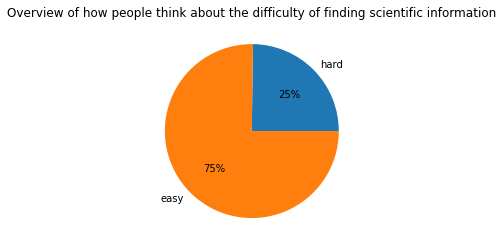

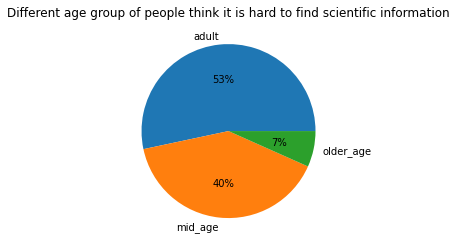

In [401]:
### insight of hard to find 
### Most of the people think it is not hard to find the scientific information
### Among the population, more young adults think it is hard to find the scientific information (however, the bias might be that more younger population filled out the questionnaire)
figure = plt.figure()
count_vector = [total_hard_count, total_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("Overview of how people think about the difficulty of finding scientific information")

figure = plt.figure()
count_vector = [adult_hard_count, mid_age_hard_count, older_adult_hard_count]
plt.pie(count_vector, labels=["adult", "mid_age", "older_age"], autopct = '%0.0f%%')
plt.title("Different age group of people think it is hard to find scientific information")

Text(0.5, 1.0, 'Older adult')

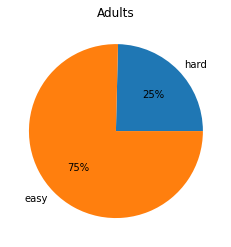

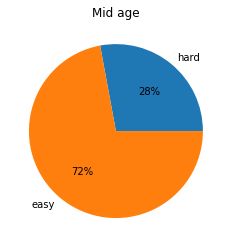

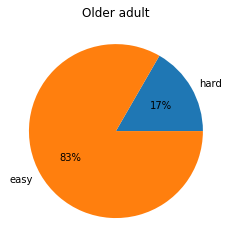

In [402]:
### compare between groups
### Result: mid age people is more likely to sufer the difficulty of finding the scientific information
figure = plt.figure()
count_vector = [adult_hard_count, adult_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("Adults")

figure = plt.figure()
count_vector = [mid_age_hard_count, mid_age_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("Mid age")

figure = plt.figure()
count_vector = [older_adult_hard_count, older_adult_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("Older adult")

##### education difference

In [403]:
groupage_df = data.groupby("education")

In [404]:
groupage_df.describe()
### Only one participant is younger than 18
### Most of participants are between 18-50 years old

satisfaction                                                \
                 count      mean       std  min  25%  50%  75%   max   
education                                                              
BA                79.0  7.303797  1.113489  4.0  7.0  7.0  8.0  10.0   
MSc               27.0  7.111111  1.050031  5.0  6.5  7.0  8.0   9.0   
PhD                6.0  7.833333  0.983192  6.0  8.0  8.0  8.0   9.0   
Senior             9.0  7.555556  1.589899  5.0  7.0  8.0  9.0   9.0   

          is it hard to find the scientific information?                      \
                                                   count      mean       std   
education                                                                      
BA                                                  79.0  0.189873  0.394707   
MSc                                                 27.0  0.444444  0.506370   
PhD                                                  6.0  0.333333  0.516398   
Senior                                               9.0  0.111111  0.333333   

                                     \
           min  25%  50%   75%  max   
education                             
BA         0.0  0.0  0.0  0.00  1.0   
MSc        0.0  0.0  0.0  1.00  1.0   
PhD        0.0  0.0  0.0  0.75  1.0   
Senior     0.0  0.0  0.0  0.00  1.0   

          is it important for the scientific information?                      \
                                                    count      mean       std   
education                                                                       
BA                                                   79.0  8.531646  1.347699   
MSc                                                  27.0  9.185185  0.962250   
PhD                                                   6.0  8.500000  1.974842   
Senior                                                9.0  9.555556  0.726483   

                                      is it urgent?                           \
           min  25%   50%   75%   max         count      mean       std  min   
education                                                                      
BA         3.0  8.0   9.0  10.0  10.0          79.0  7.189873  1.797976  3.0   
MSc        7.0  9.0   9.0  10.0  10.0          27.0  7.851852  1.680286  4.0   
PhD        5.0  8.0   9.0  10.0  10.0           6.0  6.500000  1.974842  3.0   
Senior     8.0  9.0  10.0  10.0  10.0           9.0  7.888889  1.964971  5.0   

                                Willing to shae or not                      \
           25%  50%   75%   max                  count      mean       std   
education                                                                    
BA         6.0  7.0   9.0  10.0                   77.0  0.753247  0.433949   
MSc        7.0  8.0   9.0  10.0                   26.0  0.846154  0.367946   
PhD        6.0  7.0   8.0   8.0                    5.0  0.800000  0.447214   
Senior     6.0  8.0  10.0  10.0                    9.0  1.000000  0.000000   

                                    
           min  25%  50%  75%  max  
education                           
BA         0.0  1.0  1.0  1.0  1.0  
MSc        0.0  1.0  1.0  1.0  1.0  
PhD        0.0  1.0  1.0  1.0  1.0  
Senior     1.0  1.0  1.0  1.0  1.0

In [405]:
### hard_count
hard_df  = data[data["is it hard to find the scientific information?"] == 1]
total_hard_count = hard_df.shape[0]
Sen_hard_count = hard_df[hard_df["education"] == "Senior"].shape[0]
BA_hard_count = hard_df[hard_df["education"] == "BA"].shape[0]
MSc_hard_count = hard_df[hard_df["education"] == "MSc"].shape[0]
PhD_hard_count = hard_df[hard_df["education"] == "PhD"].shape[0]
### non_hard_count
non_hard_df  = data[data["is it hard to find the scientific information?"] == 0]
total_non_hard_count = non_hard_df.shape[0]
Sen_non_hard_count = non_hard_df[non_hard_df["education"] == "Senior"].shape[0]
BA_non_hard_count = non_hard_df[non_hard_df["education"] == "BA"].shape[0]
MSc_non_hard_count = non_hard_df[non_hard_df["education"] == "MSc"].shape[0]
PhD_non_hard_count = non_hard_df[non_hard_df["education"] == "PhD"].shape[0]

Text(0.5, 1.0, 'Different education group of people think it is hard to find scientific information')

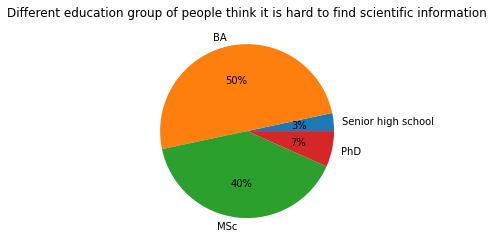

In [406]:
### insight of hard to find 
### Among the population, many people with Bachelar as highest education think it is hard to find the scientific information (however, the bias might be that more younger population filled out the questionnaire) 

figure = plt.figure()
count_vector = [Sen_hard_count, BA_hard_count, MSc_hard_count, PhD_hard_count]
plt.pie(count_vector, labels=["Senior high school", "BA", "MSc", "PhD"], autopct = '%0.0f%%')
plt.title("Different education group of people think it is hard to find scientific information")

Text(0.5, 1.0, 'PhD')

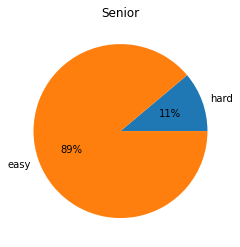

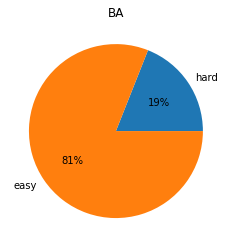

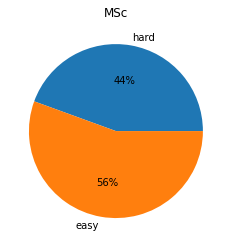

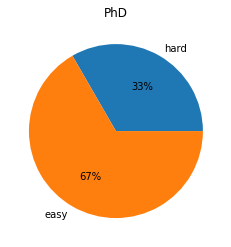

In [407]:
### compare between groups
### Suprisely, people with master's degree and PhD have lardger portion think that it is hard to find scientific information
figure = plt.figure()
count_vector = [Sen_hard_count, Sen_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("Senior")

figure = plt.figure()
count_vector = [BA_hard_count, BA_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("BA")

figure = plt.figure()
count_vector = [MSc_hard_count, MSc_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("MSc")

figure = plt.figure()
count_vector = [PhD_hard_count, PhD_non_hard_count]
plt.pie(count_vector, labels=["hard", "easy"], autopct = '%0.0f%%')
plt.title("PhD")

### The method to get the exercise information could influence the satisfication and be differed by differnt age groups and education level

### Most of the people do not satify the current information

##### Age difference

In [408]:
df_without_youth = data[data["age"] != "< 18"]
groupage_df = df_without_youth.groupby("age")
df_without_youth.head()

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1/29/2021 1:41:33,M,adult,student,student,BA,Y,2-5,"internet, friends",[injury],[blog],['Y'],PC,8,0,8,6,low,1.0,[video],big_traffic,NaN
1,1/29/2021 1:46:35,F,adult,student,student,MSc,Y,2-5,"internet, friends",[injury],"[science_search, socialmedia]",['Y'],PH,8,0,10,8,low,1.0,"[video, blog]",free,NaN
2,1/29/2021 2:13:29,F,adult,student,None_above,MSc,Y,2-5,"internet, profession, friends",[injury],"[blog, socialmedia]",['Y'],PH,7,1,9,8,low,0.0,[video],multifunc,每次分享250以上
3,1/29/2021 2:17:06,M,adult,employee,None_above,BA,N,N,"internet, friends",[capability],"[blog, science_search, socialmedia]",['Y'],PH,7,0,10,7,mid,1.0,"[video, blog]",big_traffic,交朋友
4,1/29/2021 2:35:05,M,adult,student,student,BA,Y,>10,"internet, profession, friends",[mental],"[science_search, socialmedia]",['Y'],PH,8,0,8,8,low,1.0,[video],big_traffic,NaN


In [409]:
groupage_df.describe()["satisfaction"]
### Only one participant is younger than 18
### Most of participants are between 18-50 years old

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
> 50,12.0,7.250000,1.288057,5.0,6.0,7.5,8.0,9.0
adult,65.0,7.323077,1.187272,4.0,7.0,7.0,8.0,10.0
mid_age,43.0,7.302326,1.035900,5.0,7.0,7.0,8.0,9.0


In [410]:
### replace phone into 1 computer into 0
targeted_df = df_without_youth[["age", "education", "how to get the exercise-related information", "phone or computor", "satisfaction", ]]

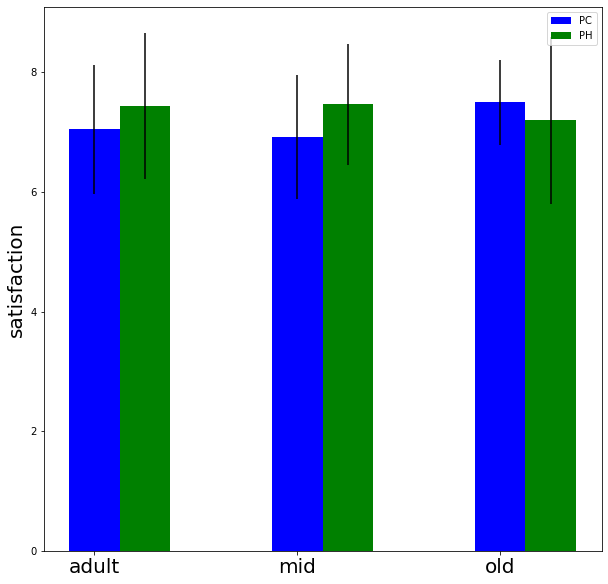

In [411]:
### result: most of the people satisfy with the information and there is no age effect on this topic
### result: searching information by using phone and PC has similar satisfaction
adult_df = targeted_df[targeted_df["age"] == "adult"]
adult_PC_sat = adult_df[adult_df["phone or computor"] == "PC"]["satisfaction"].mean()
adult_PH_sat = adult_df[adult_df["phone or computor"] == "PH"]["satisfaction"].mean()
adult_PC_sat_std = adult_df[adult_df["phone or computor"] == "PC"]["satisfaction"].std()
adult_PH_sat_std = adult_df[adult_df["phone or computor"] == "PH"]["satisfaction"].std()

mid_df = targeted_df[targeted_df["age"] == "mid_age"]
mid_PC_sat = mid_df[mid_df["phone or computor"] == "PC"]["satisfaction"].mean()
mid_PH_sat = mid_df[mid_df["phone or computor"] == "PH"]["satisfaction"].mean()
mid_PC_sat_std = mid_df[mid_df["phone or computor"] == "PC"]["satisfaction"].std()
mid_PH_sat_std = mid_df[mid_df["phone or computor"] == "PH"]["satisfaction"].std()

old_df = targeted_df[targeted_df["age"] == "> 50"]
old_PC_sat = old_df[old_df["phone or computor"] == "PC"]["satisfaction"].mean()
old_PH_sat = old_df[old_df["phone or computor"] == "PH"]["satisfaction"].mean()
old_PC_sat_std = old_df[old_df["phone or computor"] == "PC"]["satisfaction"].std()
old_PH_sat_std = old_df[old_df["phone or computor"] == "PH"]["satisfaction"].std()

position = np.arange(1,4)
PC_sat_vec = [adult_PC_sat, mid_PC_sat, old_PC_sat]
PH_sat_vec = [adult_PH_sat, mid_PH_sat, old_PH_sat]
PC_sat_vec_std = [adult_PC_sat_std, mid_PC_sat_std, old_PC_sat_std]
PH_sat_vec_std = [adult_PH_sat_std, mid_PH_sat_std, old_PH_sat_std]

figure = plt.figure(figsize = (10,10))
plt.bar(position + 0.00, PC_sat_vec, yerr = PC_sat_vec_std, color = 'b', width = 0.25, label = "PC")
plt.bar(position + 0.25, PH_sat_vec, yerr = PH_sat_vec_std, color = 'g', width = 0.25, label = "PH")
plt.xticks(position, ["adult", "mid", "old"], fontsize = 20)
plt.ylabel("satisfaction", fontsize = 20)

plt.legend()

##### Education difference

In [412]:
df = data
groupage_df = df.groupby("education")
df.head()

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1/29/2021 1:41:33,M,adult,student,student,BA,Y,2-5,"internet, friends",[injury],[blog],['Y'],PC,8,0,8,6,low,1.0,[video],big_traffic,NaN
1,1/29/2021 1:46:35,F,adult,student,student,MSc,Y,2-5,"internet, friends",[injury],"[science_search, socialmedia]",['Y'],PH,8,0,10,8,low,1.0,"[video, blog]",free,NaN
2,1/29/2021 2:13:29,F,adult,student,None_above,MSc,Y,2-5,"internet, profession, friends",[injury],"[blog, socialmedia]",['Y'],PH,7,1,9,8,low,0.0,[video],multifunc,每次分享250以上
3,1/29/2021 2:17:06,M,adult,employee,None_above,BA,N,N,"internet, friends",[capability],"[blog, science_search, socialmedia]",['Y'],PH,7,0,10,7,mid,1.0,"[video, blog]",big_traffic,交朋友
4,1/29/2021 2:35:05,M,adult,student,student,BA,Y,>10,"internet, profession, friends",[mental],"[science_search, socialmedia]",['Y'],PH,8,0,8,8,low,1.0,[video],big_traffic,NaN


In [413]:
### replace phone into 1 computer into 0
targeted_df = df[["age", "education", "how to get the exercise-related information", "phone or computor", "satisfaction", ]]
#targeted_df["phone or computor"] = targeted_df["phone or computor"].replace({"PC":0, "PH":1})

In [414]:
groupage_df.describe()["satisfaction"]
### Most of participants are bachelor (highest), and most of them satisfy with the information

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
BA,79.0,7.303797,1.113489,4.0,7.0,7.0,8.0,10.0
MSc,27.0,7.111111,1.050031,5.0,6.5,7.0,8.0,9.0
PhD,6.0,7.833333,0.983192,6.0,8.0,8.0,8.0,9.0
Senior,9.0,7.555556,1.589899,5.0,7.0,8.0,9.0,9.0


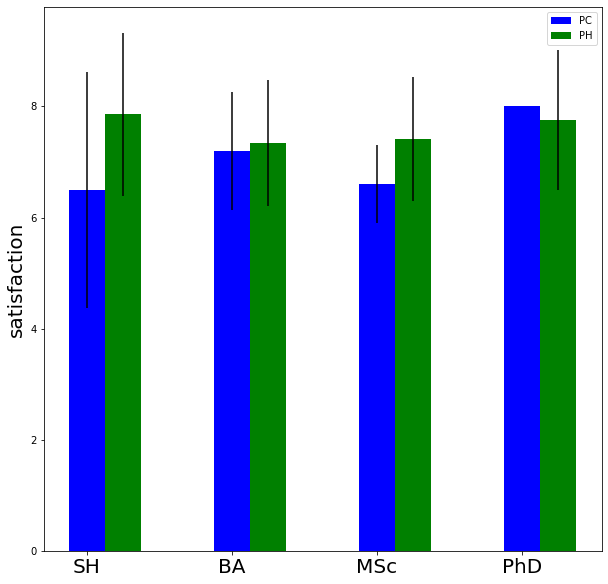

In [415]:
### result: most of the people satisfy with the information and there is no education effect on this topic
### result: searching information by using phone has a bit higher satisfaction than using PC

SH_df = targeted_df[targeted_df["education"] == "Senior"]
SH_PC_sat = SH_df[SH_df["phone or computor"] == "PC"]["satisfaction"].mean()
SH_PH_sat = SH_df[SH_df["phone or computor"] == "PH"]["satisfaction"].mean()
SH_PC_sat_std = SH_df[SH_df["phone or computor"] == "PC"]["satisfaction"].std()
SH_PH_sat_std = SH_df[SH_df["phone or computor"] == "PH"]["satisfaction"].std()

BA_df = targeted_df[targeted_df["education"] == "BA"]
BA_PC_sat = BA_df[BA_df["phone or computor"] == "PC"]["satisfaction"].mean()
BA_PH_sat = BA_df[BA_df["phone or computor"] == "PH"]["satisfaction"].mean()
BA_PC_sat_std = BA_df[BA_df["phone or computor"] == "PC"]["satisfaction"].std()
BA_PH_sat_std = BA_df[BA_df["phone or computor"] == "PH"]["satisfaction"].std()

MS_df = targeted_df[targeted_df["education"] == "MSc"]
MS_PC_sat = MS_df[MS_df["phone or computor"] == "PC"]["satisfaction"].mean()
MS_PH_sat = MS_df[MS_df["phone or computor"] == "PH"]["satisfaction"].mean()
MS_PC_sat_std = MS_df[MS_df["phone or computor"] == "PC"]["satisfaction"].std()
MS_PH_sat_std = MS_df[MS_df["phone or computor"] == "PH"]["satisfaction"].std()

PH_df = targeted_df[targeted_df["education"] == "PhD"]
PH_PC_sat = PH_df[PH_df["phone or computor"] == "PC"]["satisfaction"].mean()
PH_PH_sat = PH_df[PH_df["phone or computor"] == "PH"]["satisfaction"].mean()
PH_PC_sat_std = PH_df[PH_df["phone or computor"] == "PC"]["satisfaction"].std()
PH_PH_sat_std = PH_df[PH_df["phone or computor"] == "PH"]["satisfaction"].std()

position = np.arange(1,5)
PC_sat_vec = [SH_PC_sat, BA_PC_sat, MS_PC_sat, PH_PC_sat]
PH_sat_vec = [SH_PH_sat, BA_PH_sat, MS_PH_sat, PH_PH_sat]
PC_sat_vec_std = [SH_PC_sat_std, BA_PC_sat_std, MS_PC_sat_std, PH_PC_sat_std]
PH_sat_vec_std = [SH_PH_sat_std, BA_PH_sat_std, MS_PH_sat_std, PH_PH_sat_std]

figure = plt.figure(figsize = (10,10))
plt.bar(position + 0.00, PC_sat_vec, yerr = PC_sat_vec_std, color = 'b', width = 0.25, label = "PC")
plt.bar(position + 0.25, PH_sat_vec, yerr = PH_sat_vec_std, color = 'g', width = 0.25, label = "PH")

plt.xticks(position, ["SH", "BA", "MSc", "PhD"], fontsize = 20)
plt.ylabel("satisfaction", fontsize = 20)

plt.legend()

### Most of the people in Taiwan find the exercise related information on social media and there is no effect of age

In [416]:
data.head()

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1/29/2021 1:41:33,M,adult,student,student,BA,Y,2-5,"internet, friends",[injury],[blog],['Y'],PC,8,0,8,6,low,1.0,[video],big_traffic,NaN
1,1/29/2021 1:46:35,F,adult,student,student,MSc,Y,2-5,"internet, friends",[injury],"[science_search, socialmedia]",['Y'],PH,8,0,10,8,low,1.0,"[video, blog]",free,NaN
2,1/29/2021 2:13:29,F,adult,student,None_above,MSc,Y,2-5,"internet, profession, friends",[injury],"[blog, socialmedia]",['Y'],PH,7,1,9,8,low,0.0,[video],multifunc,每次分享250以上
3,1/29/2021 2:17:06,M,adult,employee,None_above,BA,N,N,"internet, friends",[capability],"[blog, science_search, socialmedia]",['Y'],PH,7,0,10,7,mid,1.0,"[video, blog]",big_traffic,交朋友
4,1/29/2021 2:35:05,M,adult,student,student,BA,Y,>10,"internet, profession, friends",[mental],"[science_search, socialmedia]",['Y'],PH,8,0,8,8,low,1.0,[video],big_traffic,NaN


([<matplotlib.patches.Wedge at 0x2ecdcdbbdc8>,
 [Text(0.7641241712858572, 0.7912738153488349, 'blog'),
  Text(-0.7216650130712043, 0.8301804676749139, 'science_search'),
  Text(-0.0958711574262699, -1.0958141818637626, 'socialmedia')],
 [Text(0.4167950025195584, 0.43160389928118265, '26%'),
  Text(-0.3936354616752023, 0.4528257096408621, '22%'),
  Text(-0.05229335859614721, -0.5977168264711432, '53%')])

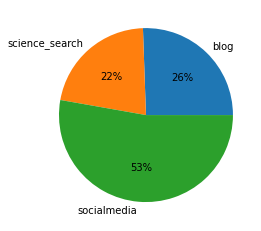

In [417]:
### Result: most of the people search for exercise-related information via social media
targeted_df = data[["age", "how to get the exercise-related information"]]
### pei plot
pei_list = []
for i in range(0,targeted_df.shape[0]):
    for approach in targeted_df.iloc[i,:]["how to get the exercise-related information"]:
        new = [targeted_df.iloc[i,:]["age"], approach]
        pei_list.append(new)
pei_df = pd.DataFrame(pei_list, columns = ["age", "approach"]) 
blog_count = int(pei_df["approach"].value_counts().blog)
science_search_count = int(pei_df["approach"].value_counts().science_search)
socialmedia_count = int(pei_df["approach"].value_counts().socialmedia)
count_vector = list([blog_count, science_search_count, socialmedia_count])
plt.pie(count_vector, labels=["blog", "science_search", "socialmedia"], autopct = '%0.0f%%')

In [418]:
pei_df

,age,approach
0,adult,blog
1,adult,science_search
2,adult,socialmedia
3,adult,blog
4,adult,socialmedia
...,...,...
175,mid_age,blog
176,mid_age,science_search
177,adult,science_search
178,adult,socialmedia


Text(0.5, 1.0, 'old adult')

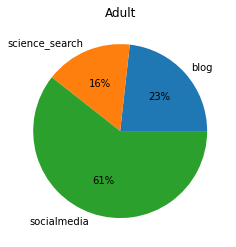

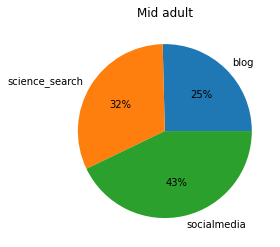

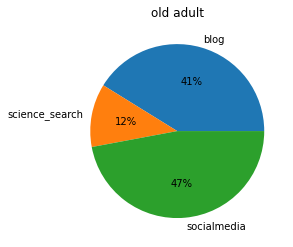

In [419]:
### Result: most of the people search for exercise-related information via social media
### However, the parttern is influenced by age group. Except for social media, many mid-age adult saerch for execise related information via scientific platform
### Furthermore, for older adults, 43% of them get the information from blog posts (but it is possible that they took social media post as blog)

adult_df = pei_df[pei_df["age"]=="adult"]
mid_df = pei_df[pei_df["age"]=="mid_age"]
old_df = pei_df[pei_df["age"]=="> 50"]

adult_blog_count = int(adult_df["approach"].value_counts().blog)
adult_science_search_count = int(adult_df["approach"].value_counts().science_search)
adult_socialmedia_count = int(adult_df["approach"].value_counts().socialmedia)
figure = plt.figure()
count_vector = list([adult_blog_count, adult_science_search_count, adult_socialmedia_count])
plt.pie(count_vector, labels=["blog", "science_search", "socialmedia"], autopct = '%0.0f%%')
plt.title("Adult")

mid_blog_count = int(mid_df["approach"].value_counts().blog)
mid_science_search_count = int(mid_df["approach"].value_counts().science_search)
mid_socialmedia_count = int(mid_df["approach"].value_counts().socialmedia)
figure = plt.figure()
count_vector = list([mid_blog_count, mid_science_search_count, mid_socialmedia_count])
plt.pie(count_vector, labels=["blog", "science_search", "socialmedia"], autopct = '%0.0f%%')
plt.title("Mid adult")

old_blog_count = int(old_df["approach"].value_counts().blog)
old_science_search_count = int(old_df["approach"].value_counts().science_search)
old_socialmedia_count = int(old_df["approach"].value_counts().socialmedia)
figure = plt.figure()
count_vector = list([old_blog_count, old_science_search_count, old_socialmedia_count])
plt.pie(count_vector, labels=["blog", "science_search", "socialmedia"], autopct = '%0.0f%%')
plt.title("old adult")

### Most of the people in Taiwan search on the internet by themselves to deal with the obstacle during exercising

In [420]:
data.head()

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1/29/2021 1:41:33,M,adult,student,student,BA,Y,2-5,"internet, friends",[injury],[blog],['Y'],PC,8,0,8,6,low,1.0,[video],big_traffic,NaN
1,1/29/2021 1:46:35,F,adult,student,student,MSc,Y,2-5,"internet, friends",[injury],"[science_search, socialmedia]",['Y'],PH,8,0,10,8,low,1.0,"[video, blog]",free,NaN
2,1/29/2021 2:13:29,F,adult,student,None_above,MSc,Y,2-5,"internet, profession, friends",[injury],"[blog, socialmedia]",['Y'],PH,7,1,9,8,low,0.0,[video],multifunc,每次分享250以上
3,1/29/2021 2:17:06,M,adult,employee,None_above,BA,N,N,"internet, friends",[capability],"[blog, science_search, socialmedia]",['Y'],PH,7,0,10,7,mid,1.0,"[video, blog]",big_traffic,交朋友
4,1/29/2021 2:35:05,M,adult,student,student,BA,Y,>10,"internet, profession, friends",[mental],"[science_search, socialmedia]",['Y'],PH,8,0,8,8,low,1.0,[video],big_traffic,NaN


In [421]:
### Result: most of the people search for exercise-related information via social media
targeted_df = data[["age", "solution of the obstacle"]]
### pei plot
targeted_list = []
for i in range(0,targeted_df.shape[0]):
    for approach in targeted_df.iloc[i,:]["solution of the obstacle"].split(", "):
        new = [targeted_df.iloc[i,:]["age"], approach]
        targeted_list.append(new)
targeted_df = pd.DataFrame(targeted_list, columns = ["age", "approach"])
targeted_df.describe()

,age,approach
count,219,219
unique,4,5
top,adult,friends
freq,118,86


In [422]:
targeted_df["approach"].unique()

array(['internet', 'friends', 'profession', 'books', 'N'], dtype=object)

([<matplotlib.patches.Wedge at 0x2ecdce02108>,
 [Text(0.3762221361519223, 1.033661890692157, 'internet'),
  Text(-0.9362283136484202, -0.5774742805727676, 'friends'),
  Text(0.8528432858961311, -0.6947361583377463, 'profession'),
  Text(1.0998836553989348, -0.015998268227453014, 'books')],
 [Text(0.20521207426468485, 0.5638155767411764, '39%'),
  Text(-0.5106699892627746, -0.31498597122150956, '40%'),
  Text(0.4651872468524351, -0.3789469954569525, '21%'),
  Text(0.5999365393085098, -0.008726328124065279, '0%')])

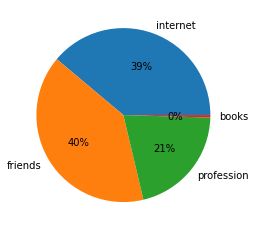

In [423]:
### result: most of the people either ask their friends or search online when they encounter obstacles during exercising
internet_count = int(targeted_df["approach"].value_counts().internet)
friends_count = int(targeted_df["approach"].value_counts().friends)
profession_count = int(targeted_df["approach"].value_counts().profession)
books_count = int(targeted_df["approach"].value_counts().books)
count_vector = list([internet_count, friends_count, profession_count, books_count])
plt.pie(count_vector, labels=["internet", "friends", "profession", "books"], autopct = '%0.0f%%')

### how people think about scientific information when it comes to exercise?

In [424]:
data.head()

,time,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1/29/2021 1:41:33,M,adult,student,student,BA,Y,2-5,"internet, friends",[injury],[blog],['Y'],PC,8,0,8,6,low,1.0,[video],big_traffic,NaN
1,1/29/2021 1:46:35,F,adult,student,student,MSc,Y,2-5,"internet, friends",[injury],"[science_search, socialmedia]",['Y'],PH,8,0,10,8,low,1.0,"[video, blog]",free,NaN
2,1/29/2021 2:13:29,F,adult,student,None_above,MSc,Y,2-5,"internet, profession, friends",[injury],"[blog, socialmedia]",['Y'],PH,7,1,9,8,low,0.0,[video],multifunc,每次分享250以上
3,1/29/2021 2:17:06,M,adult,employee,None_above,BA,N,N,"internet, friends",[capability],"[blog, science_search, socialmedia]",['Y'],PH,7,0,10,7,mid,1.0,"[video, blog]",big_traffic,交朋友
4,1/29/2021 2:35:05,M,adult,student,student,BA,Y,>10,"internet, profession, friends",[mental],"[science_search, socialmedia]",['Y'],PH,8,0,8,8,low,1.0,[video],big_traffic,NaN


In [425]:
### result: most of the people satisfy with the current solution
###         only 25% of the people think it is hard to find the scientific based solution
###         most of the people think it is extremely important for the scientific based information but it is less urgent
targeted_df = data[["satisfaction", "is it hard to find the scientific information?", "is it important for the scientific information?", "is it urgent?"]]
targeted_df.describe()

,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?
count,121.000000,121.000000,121.000000,121.000000
mean,7.305785,0.247934,8.752066,7.355372
std,1.131687,0.433609,1.305635,1.806744
min,4.000000,0.000000,3.000000,3.000000
25%,7.000000,0.000000,8.000000,6.000000
50%,7.000000,0.000000,9.000000,8.000000
75%,8.000000,0.000000,10.000000,9.000000
max,10.000000,1.000000,10.000000,10.000000


<AxesSubplot:>

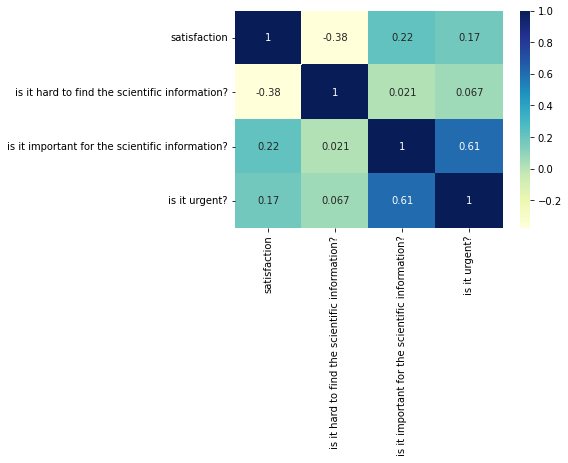

In [426]:
### Result: the importance and urgency have 0.61 correlation but people think it is more important than urgent
corr = targeted_df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True, fmt='.2g')

### For the low satisfaction people, how do they think of the scientific information and where do they get the information?

In [427]:
### low satisfaction defined as the value below average (7)
targeted_df = data[data["satisfaction"] < 7][["satisfaction", "is it hard to find the scientific information?", "is it important for the scientific information?", "is it urgent?"]]

([<matplotlib.patches.Wedge at 0x2ecdd0a0ac8>,
 [Text(0.858741251714523, 0.6874325149451214, 'low sat'),
  Text(-0.8587413160765964, -0.6874324345439595, 'high sat')],
 [Text(0.46840431911701247, 0.37496318997006617, '21%'),
  Text(-0.46840435422359794, -0.374963146114887, '79%')])

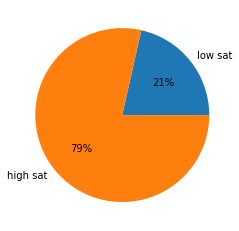

In [428]:
total_count  = data.shape[0]
low_sat_count = targeted_df.shape[0]
high_sat_count = total_count - low_sat_count
count_vector = [low_sat_count, high_sat_count]
plt.pie(count_vector, labels = ["low sat", "high sat"], autopct = '%0.0f%%')

In [429]:
### Result: interestingly, 53% of the people with low satisfaction think it is hard to find the scientific information where the average percentage of the difficulty among the group is 23%
targeted_df.describe()

,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?
count,26.000000,26.000000,26.000000,26.000000
mean,5.615385,0.538462,8.423077,7.192308
std,0.571099,0.508391,1.770267,1.855138
min,4.000000,0.000000,3.000000,3.000000
25%,5.000000,0.000000,8.000000,6.000000
50%,6.000000,1.000000,8.500000,7.500000
75%,6.000000,1.000000,10.000000,8.000000
max,6.000000,1.000000,10.000000,10.000000


### Which kind of platform is prefered by the people who is willing to share the information?

In [430]:
targeted_df = data[["gender", "age", "profession", "phone or computor", "which kind of platform"]]
targeted_df["which kind of platform"] = data["which kind of platform"].replace({"UI/UX":"design"})

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


([<matplotlib.patches.Wedge at 0x2ecdd0fa308>,
 [Text(0.18475963815556656, 1.0843725725545736, 'free'),
  Text(-0.8932641340375261, -0.6419339427403637, 'traffic'),
  Text(0.5334293106842435, -0.9620047663618579, 'func'),
  Text(1.006442820550963, -0.44392887826928096, 'reward'),
  Text(1.090744032139446, -0.14239893381687752, 'design')],
 [Text(0.10077798444849084, 0.5914759486661311, '45%'),
  Text(-0.48723498220228695, -0.3501457869492893, '31%'),
  Text(0.29096144219140546, -0.5247298725610133, '16%'),
  Text(0.5489688112096162, -0.24214302451051686, '5%'),
  Text(0.5949512902578795, -0.07767214571829681, '4%')])

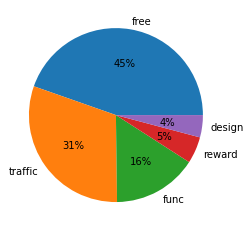

In [431]:
free_count = targeted_df["which kind of platform"].value_counts().free
traffic_count = targeted_df["which kind of platform"].value_counts().big_traffic    
func_count = targeted_df["which kind of platform"].value_counts().multifunc
reward_count = targeted_df["which kind of platform"].value_counts().reward
design_count = targeted_df["which kind of platform"].value_counts().design

count_vector = [free_count, traffic_count, func_count, reward_count, design_count]
plt.pie(count_vector, labels = ["free", "traffic", "func", "reward", "design"], autopct = '%0.0f%%')

In [432]:
gender_group_data = targeted_df.groupby("gender")
age_group_data = targeted_df.groupby("age")
profession_group_data = targeted_df.groupby("profession")
PC_PH_group_data = targeted_df.groupby("phone or computor")

In [433]:
### reuslt: no gender difference
gender_group_data.describe()["which kind of platform"]

,count,unique,top,freq
gender,,,,
F,25,4,free,11
M,96,5,free,43


In [434]:
### reuslt: younger adult prefer the platform with high traffic and mid-old adult prefer the free platform
age_group_data.describe()["which kind of platform"]

,count,unique,top,freq
age,,,,
< 18,1,1,big_traffic,1
> 50,12,4,free,7
adult,65,5,big_traffic,25
mid_age,43,5,free,23


In [435]:
profession_group_data.describe()["which kind of platform"]

,count,unique,top,freq
profession,,,,
None_above,58,4,free,26
PE,3,3,big_traffic,1
analyst,2,1,free,2
athlete,8,2,free,7
doctor,3,2,free,2
nutritionist,2,2,multifunc,1
physiotherapist,6,4,free,3
psychologist,1,1,big_traffic,1
researcher,3,1,big_traffic,3


In [436]:
PC_PH_group_data.describe()["which kind of platform"]

,count,unique,top,freq
phone or computor,,,,
PC,34,5,big_traffic,13
PH,87,5,free,42


# Building predictive model

* We can build a predictive model to predict whether the people is willing to pay for the service
* Which factor influence the willing of paying the most?

## Data preprocessing

* dealing with outlier and missing data

In [437]:
### no missing data
### only one person younger than 18, which would be removed
new_df = data.drop("time", axis = 1)
new_df.describe()

,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,Willing to shae or not
count,121.000000,121.000000,121.000000,121.000000,117.000000
mean,7.305785,0.247934,8.752066,7.355372,0.794872
std,1.131687,0.433609,1.305635,1.806744,0.405532
min,4.000000,0.000000,3.000000,3.000000,0.000000
25%,7.000000,0.000000,8.000000,6.000000,1.000000
50%,7.000000,0.000000,9.000000,8.000000,1.000000
75%,8.000000,0.000000,10.000000,9.000000,1.000000
max,10.000000,1.000000,10.000000,10.000000,1.000000


In [438]:
new_df_without_outlier = new_df[new_df["age"] != "< 18"]

In [449]:
new_df_without_outlier.shape

(120, 21)

* quantify the dataset

In [450]:
new_df_without_outlier.head(1)

,gender,age,current work,profession,education,exercise habit,exercise frequency,solution of the obstacle,obstacle during exercise,how to get the exercise-related information,sports app usage,phone or computor,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,how to share,which kind of platform,expectation (price)
0,1,1,student,student,BA,1,2,"internet, friends",[injury],[blog],1,PC,8,0,8,6,0,1.0,[video],big_traffic,NaN


In [451]:
### gender=> F:0, M:1
### age=> adult:1, mid:2, old:3
### current work: onehotencode
### profession: onehotencode
### exercise habit: Y:1, N:0
### exercise frequency=> N:0, <2:1, 2-5:2, 5-10:3, >10: 4
### solution of the obstacle: onehotencode
### obstacle during exercise: onehotencode
### how to get the exercise-related information: onehotencode
### sports app usage: Y:1, N:0
### phone or computor: onehotencode
### how much willing to pay=> as the target, low: 0(not willing to pay), mid-high: 0( willing to pay more)
new_df_without_outlier["gender"] = new_df_without_outlier["gender"].replace({"F":0, "M":1})
new_df_without_outlier["age"] = new_df_without_outlier["age"].replace({"adult":1, "mid_age":2, "> 50":3})
new_df_without_outlier["exercise habit"] = new_df_without_outlier["exercise habit"].replace({"Y":1, "N":0})
new_df_without_outlier["exercise frequency"] = new_df_without_outlier["exercise frequency"].replace({"N":0, "<2":1, "2-5":2, "5-10":3, ">10": 4})
new_df_without_outlier["sports app usage"] = new_df_without_outlier["sports app usage"].replace({"['Y']":1, "['N']":0})
new_df_without_outlier["how much willing to pay"] = new_df_without_outlier["how much willing to pay"].replace({"low":0, "mid":1, "high":1})

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [461]:
OHE = OneHotEncoder()
OHE_df = new_df_without_outlier[["current work", "how to get the exercise-related information", "solution of the obstacle", "obstacle during exercise", "phone or computor"]]
OHE_df = OHE_df.astype("string")
OHE_transformed_array = OHE.fit_transform(OHE_df).toarray()
columns = OHE.get_feature_names([ "current work", "how to get the exercise-related information", "solution of the obstacle", "obstacle during exercise", "phone or computor"])
OHE_transformed_df = pd.DataFrame(OHE_transformed_array, columns = columns)

In [462]:
manual_replaced_df = new_df_without_outlier.drop(columns=["profession", "education", "current work", "how to get the exercise-related information", "solution of the obstacle", "obstacle during exercise", "phone or computor", "how to share", "which kind of platform", "expectation (price)"], axis = 1)

In [463]:
manual_replaced_df.reset_index(drop=True, inplace=True)
OHE_transformed_df.reset_index(drop=True, inplace=True)

In [530]:
ML_df = pd.concat([manual_replaced_df, OHE_transformed_df], axis = 1 )
ML_df = ML_df.fillna(0)
ML_df

,gender,age,exercise habit,exercise frequency,sports app usage,satisfaction,is it hard to find the scientific information?,is it important for the scientific information?,is it urgent?,how much willing to pay,Willing to shae or not,current work_employee,current work_retired,current work_self-employee,current work_student,current work_unemployee,"how to get the exercise-related information_['blog', 'science_search', 'socialmedia']","how to get the exercise-related information_['blog', 'science_search']","how to get the exercise-related information_['blog', 'socialmedia']",how to get the exercise-related information_['blog'],"how to get the exercise-related information_['science_search', 'socialmedia']",how to get the exercise-related information_['science_search'],how to get the exercise-related information_['socialmedia'],how to get the exercise-related information_[],solution of the obstacle_N,solution of the obstacle_friends,solution of the obstacle_internet,"solution of the obstacle_internet, books","solution of the obstacle_internet, friends","solution of the obstacle_internet, profession","solution of the obstacle_internet, profession, friends",solution of the obstacle_profession,"solution of the obstacle_profession, friends","obstacle during exercise_['capability', 'diet']","obstacle during exercise_['capability', 'mental']",obstacle during exercise_['capability'],obstacle during exercise_['diet'],"obstacle during exercise_['injury', 'capability', 'diet']","obstacle during exercise_['injury', 'capability']","obstacle during exercise_['injury', 'diet']","obstacle during exercise_['injury', 'mental']",obstacle during exercise_['injury'],"obstacle during exercise_['mental', 'diet']",obstacle during exercise_['mental'],obstacle during exercise_[],phone or computor_PC,phone or computor_PH
0,1,1,1,2,1,8,0,8,6,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,1,1,2,1,8,0,10,8,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,1,1,2,1,7,1,9,8,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,0,1,7,0,10,7,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,1,4,1,8,0,8,8,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,2,1,1,1,6,0,8,8,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
116,1,2,1,3,1,7,1,8,7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
117,0,2,1,2,1,7,1,9,9,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118,1,1,1,2,1,7,0,7,7,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [642]:
intended_inputs_1 = ML_df.drop("how much willing to pay", axis = 1).columns
intended_inputs_2 = ["age", "exercise habit", "exercise frequency", "satisfaction", "is it hard to find the scientific information?", "is it important for the scientific information?", "is it urgent?", "phone or computor_PC"]
intended_inputs_3 = ["age", "exercise habit", "exercise frequency", "satisfaction", "is it hard to find the scientific information?", "is it important for the scientific information?", "is it urgent?", "phone or computor_PC", "current work_employee"]

inputs_df = ML_df[intended_inputs_3]
targets_df = ML_df["how much willing to pay"]

In [643]:
scaler = StandardScaler()
standardized_inputs = scaler.fit_transform(inputs_df)

In [644]:
targets = np.array(targets_df)

In [645]:
X_train, X_test, y_train, y_test = train_test_split(standardized_inputs, targets, test_size = 0.2, random_state=42)

In [646]:
y_train.mean()

0.375

## Train, test, and evaluate model

In [651]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


* Logistic regression

In [669]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train, y_train)
log_reg_model.score(X_test, y_test)

0.6666666666666666

In [741]:
labels = ["not willing", "willing"]
acc = accuracy_score(y_test, log_reg_model.predict(X_test))
cm = confusion_matrix(y_test, log_reg_model.predict(X_test))
specificity = cm[0,0]/(cm[0,0] + cm[0,1])
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print("logistic" + "\n"+ "acc: " + str(round(acc, 3)) + "\n" + "sensitivity: " + str(round(sensitivity)) + "\n" + "specificity: " + str(round(specificity,3)))

logistic
acc: 0.667
sensitivity: 0
specificity: 0.842


Text(0.5, 1.0, 'Logistic confusion matrix')

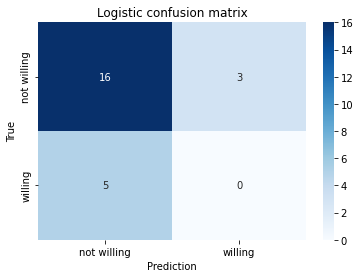

In [746]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_ylabel('True')
ax.set_yticklabels(labels = labels)
ax.set_xlabel('Prediction')
ax.set_xticklabels(labels = labels)
ax.set_title("Logistic confusion matrix")

* Support vector machine classifier

In [747]:
from sklearn.svm import SVC
SVC_grid_search = GridSearchCV(svc, param_grid = SVC_para, cv = 10, return_train_score = True)
SVC_grid_search.fit(X_train, y_train)
SVC_best_reg = SVC_grid_search.best_estimator_
SVC_best_reg.score(X_test, y_test)

0.5833333333333334

In [748]:
acc = accuracy_score(y_test, SVC_best_reg.predict(X_test))
cm = confusion_matrix(y_test, SVC_best_reg.predict(X_test))
specificity = cm[0,0]/(cm[0,0] + cm[0,1])
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print("SVC" + "\n"+ "acc: " + str(round(acc, 3)) + "\n" + "sensitivity: " + str(round(sensitivity,3)) + "\n" + "specificity: " + str(round(specificity,3)))

SVC
acc: 0.583
sensitivity: 0.0
specificity: 0.737


Text(0.5, 1.0, 'SVC confusion matrix')

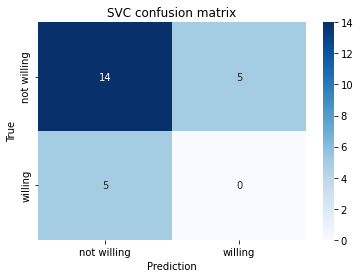

In [749]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_ylabel('True')
ax.set_yticklabels(labels = labels)
ax.set_xlabel('Prediction')
ax.set_xticklabels(labels = labels)
ax.set_title("SVC confusion matrix")

* Decision tree

In [750]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_grid_search = GridSearchCV(DT, param_grid = DT_para, cv = 10, return_train_score = True)
DT_grid_search.fit(X_train, y_train)
DT_best_reg = DT_grid_search.best_estimator_
DT_best_reg.score(X_test, y_test)

0.7083333333333334

In [751]:
acc = accuracy_score(y_test, DT_best_reg.predict(X_test))
cm = confusion_matrix(y_test, DT_best_reg.predict(X_test))
specificity = cm[0,0]/(cm[0,0] + cm[0,1])
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print("DT" + "\n"+ "acc: " + str(round(acc, 3)) + "\n" + "sensitivity: " + str(round(sensitivity,3)) + "\n" + "specificity: " + str(round(specificity,3)))

DT
acc: 0.708
sensitivity: 0.2
specificity: 0.842


Text(0.5, 1.0, 'DT confusion matrix')

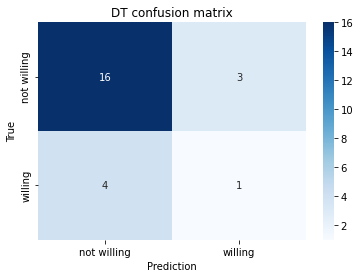

In [752]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_ylabel('True')
ax.set_yticklabels(labels = labels)
ax.set_xlabel('Prediction')
ax.set_xticklabels(labels = labels)
ax.set_title("DT confusion matrix")

* Random Forest

In [753]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF_grid_search = GridSearchCV(RF, param_grid = DT_para, cv = 10, return_train_score = True)
RF_grid_search.fit(X_train, y_train)
RF_best_reg = RF_grid_search.best_estimator_
RF_best_reg.score(X_test, y_test)

0.7916666666666666

In [754]:
acc = accuracy_score(y_test, RF_best_reg.predict(X_test))
cm = confusion_matrix(y_test, RF_best_reg.predict(X_test))
specificity = cm[0,0]/(cm[0,0] + cm[0,1])
sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print("RF" + "\n"+ "acc: " + str(round(acc, 3)) + "\n" + "sensitivity: " + str(round(sensitivity,3)) + "\n" + "specificity: " + str(round(specificity,3)))

RF
acc: 0.792
sensitivity: 0.2
specificity: 0.947


Text(0.5, 1.0, 'RF confusion matrix')

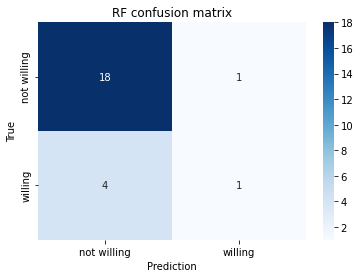

In [755]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap="Blues")
ax.set_ylabel('True')
ax.set_yticklabels(labels = labels)
ax.set_xlabel('Prediction')
ax.set_xticklabels(labels = labels)
ax.set_title("RF confusion matrix")

### ROC curve

In [756]:
log_predictions = log_reg_model.predict_proba(X_test)

svc_predictions = SVC_best_reg.predict_proba(X_test)

dt_predictions = DT_best_reg.predict_proba(X_test)

rf_predictions = RF_best_reg.predict_proba(X_test)


In [757]:
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_predictions[:, 1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_predictions[:, 1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_predictions[:, 1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_predictions[:, 1])

In [758]:
log_auc = metrics.auc(log_fpr, log_tpr)
svc_auc = metrics.auc(svc_fpr, svc_tpr)
dt_auc = metrics.auc(dt_fpr, dt_tpr)
rf_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0, 0.5, 'True positive rate ')

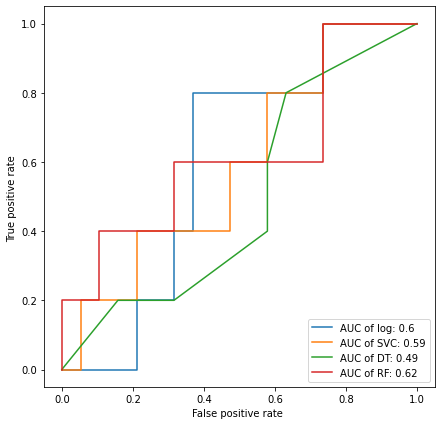

In [759]:
log_label = "AUC of log: " + str(round(log_auc, 2))
svc_label = "AUC of SVC: " + str(round(svc_auc, 2))
dt_label = "AUC of DT: " + str(round(dt_auc, 2))
rf_label = "AUC of RF: " + str(round(rf_auc, 2))


figure = plt.figure(figsize = (7,7))
plt.plot(log_fpr,log_tpr,  label = log_label)
plt.plot(svc_fpr,svc_tpr,  label = svc_label)
plt.plot(dt_fpr,dt_tpr,  label = dt_label)
plt.plot(rf_fpr,rf_tpr,  label = rf_label)



plt.legend(loc = "lower right")
plt.xlabel("False positive rate ")
plt.ylabel("True positive rate ")

### Feature importance

Text(0.5, 1.0, 'Logistic')

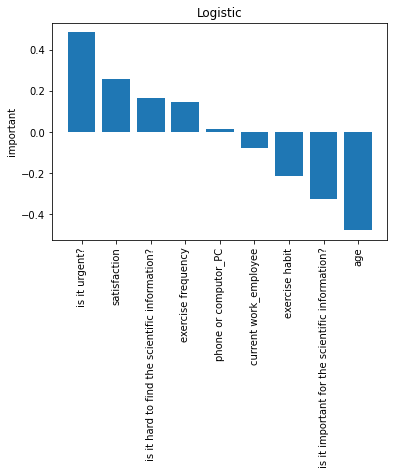

In [778]:
importance = log_reg_model.coef_[0]
features = inputs_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = [1,2,3,4,5,6,7,8,9]
plt.bar(feature_pos, importance_sorted_df["importance"].head(10) ,align='center')
plt.xticks(feature_pos, labels = importance_sorted_df["features"].head(10), rotation = 90)
plt.ylabel("important")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Logistic")

Text(0.5, 0, 'important')

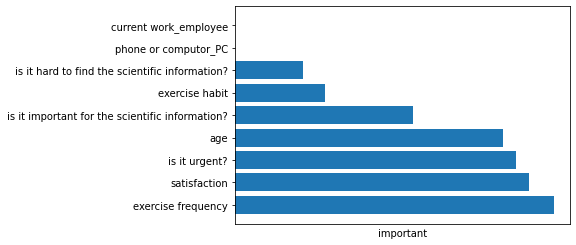

In [781]:
importance = DT_best_reg.feature_importances_
features = inputs_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = np.arange(len(features))
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

Text(0.5, 0, 'important')

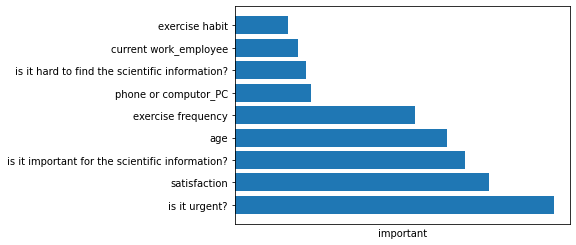

In [782]:
importance = RF_best_reg.feature_importances_
features = inputs_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = np.arange(len(features))
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

## Conclusion of the prediction

In [ ]:
### Conclusion of the predictive model
### The predictive power is low, it is hard to predict the customer's behavior based on the present dataset
### The present dataset is unbalance and the data size is too small
### Interestingly, most of the models pointed out the consistent important features including the answer of "Is it urgent?", "satisfaction", "is it important for the scientific information?"